In [2]:
# from google.colab import drive
# drive.mount("/content/drive/")

Mounted at /content/drive/


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
import plotly
import cufflinks as cf
cf.go_offline()

# import plotly.io as pio
# pio.renderers.default = "colab"


In [3]:
import os
filepath = os.path.join('/content/drive/MyDrive/My Notebooks/MY_2022 ML DS Master Class/01-Linear Regression/','Advertising.csv')

In [7]:
# df = pd.read_csv(filepath)
df = pd.read_csv('Advertising.csv')

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In SIMPLE-LINEAR-REGRESSION we deals with only one single feature X. But we have 3. So we add them up and made it as a single feature. 

In [9]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [10]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

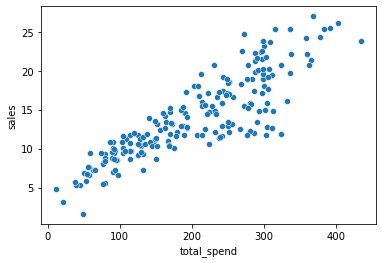

In [11]:
sns.scatterplot(x='total_spend', y='sales', data = df)

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

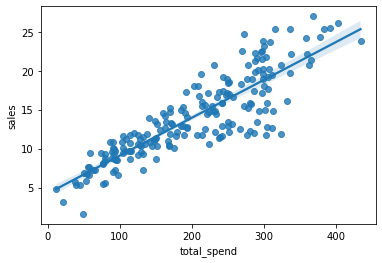

In [12]:
sns.regplot(x='total_spend',y='sales',data=df)

In [13]:
X = df['total_spend']
y = df['sales']

In [45]:
help(np.polyfit)

In [15]:
np.polyfit(X, y, deg= 1)

array([0.04868788, 4.24302822])

In [16]:
# y = B1x + B0 Linear line
# B1 = 0.04868788
# B0 = 4.24302822

In [17]:
potential_spend = np.linspace(0,500,100)

In [18]:
preicted_sales = 0.04868788 * potential_spend + 4.24302822

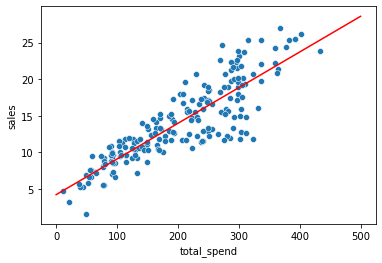

In [19]:
sns.scatterplot(x='total_spend', y='sales', data = df)
plt.plot(potential_spend, preicted_sales, color='red')

In [20]:
spend = 250

sales = 0.04868788 * spend + 4.24302822

sales

16.41499822

In [21]:
np.polyfit(X,y,3)
# for 3 degree polinomials
# y = B3x^3 + B2x^2 + B1x + B0

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [22]:
pot_spend = np.linspace(0,500,100)
pred_sales = 3.07615033e-07 * pot_spend**3 + (-1.89392449e-04)*pot_spend**2 + 8.20886302e-02 * pot_spend + 2.70495053e+00

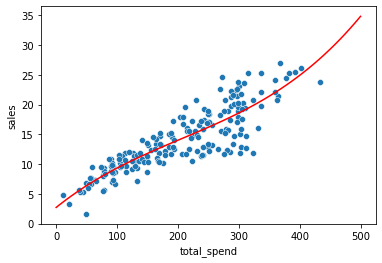

In [23]:
sns.scatterplot(x='total_spend', y='sales', data = df)
plt.plot(pot_spend, pred_sales,color='red')

## Introducing SciKit Learn

We will work a lot with the scitkit learn library, so get comfortable with its model estimator syntax, as well as exploring its incredibly useful documentation!

---

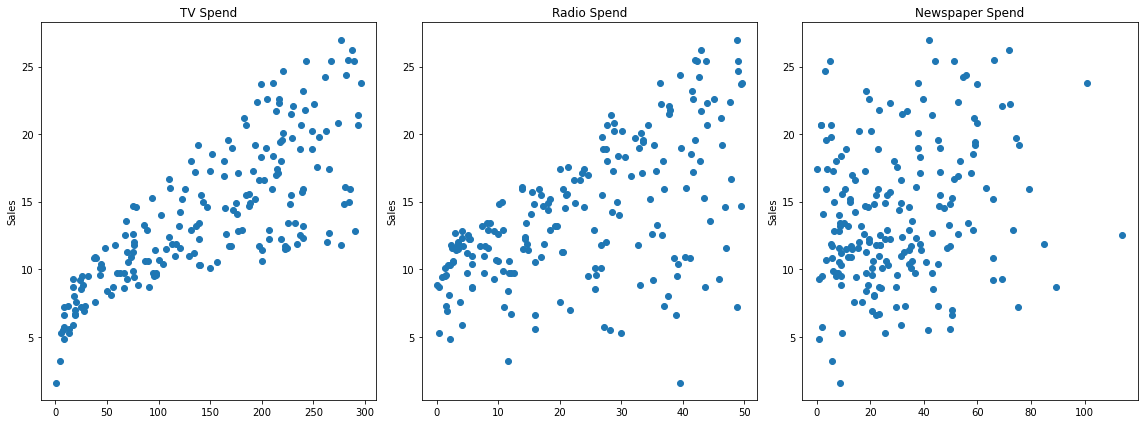

In [24]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

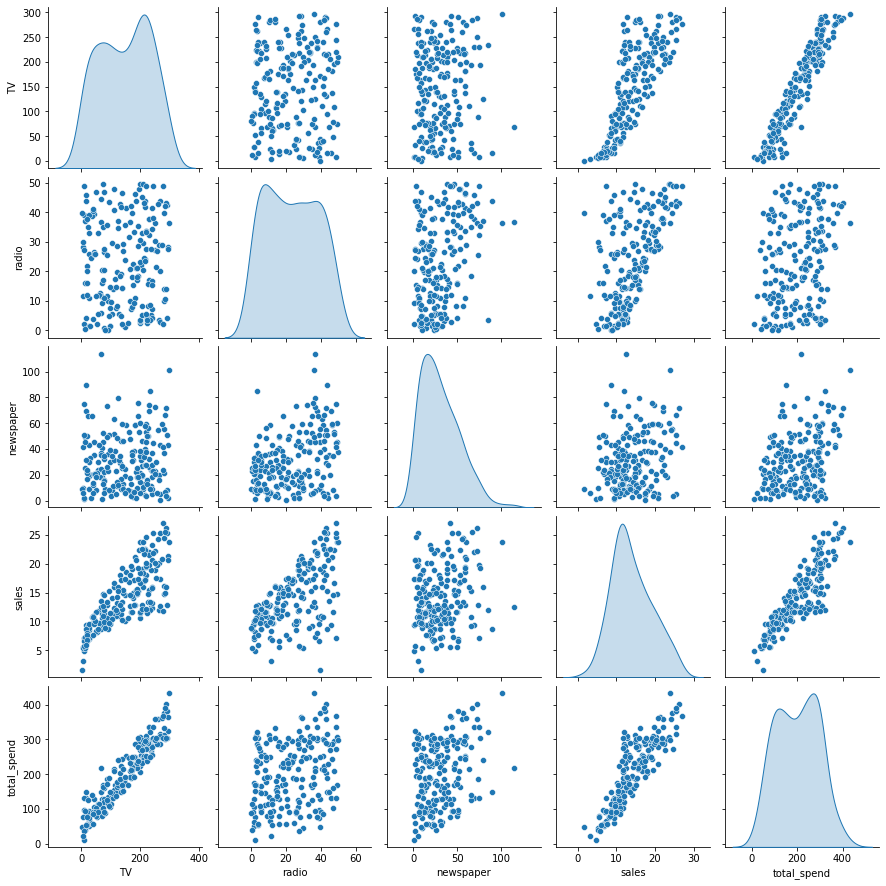

In [25]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

In [26]:
X = df.drop('sales', axis=1)
y = df['sales']

In [27]:
from sklearn.model_selection import train_test_split

In [46]:
help(train_test_split)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
len(X_train)

140

In [31]:
len(X_test)

60

In [32]:
from sklearn.linear_model import LinearRegression

In [47]:
help(LinearRegression)

In [34]:
my_model = LinearRegression()

In [35]:
my_model.fit(X_train,y_train)

LinearRegression()

In [36]:
X_test.head()

,TV,radio,newspaper,total_spend
37,74.7,49.4,45.7,169.8
109,255.4,26.9,5.5,287.8
31,112.9,17.4,38.6,168.9
89,109.8,47.8,51.4,209.0
66,31.5,24.6,2.2,58.3


In [37]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [38]:
test_predict = my_model.predict(X_test) 

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

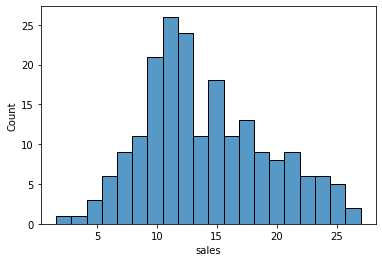

In [41]:
sns.histplot(data = df, x='sales',bins = 20)

In [42]:
mean_absolute_error(y_test, test_predict)

1.2137457736144812

In [43]:
np.sqrt(mean_squared_error(y_test,test_predict))

1.5161519375993893

In [52]:
# plt.iplot(kind='hist', x='sales',data = df, bins=30)
df['sales'].iplot(kind='hist',bins=30,color='blue')